In [23]:
from google.colab import drive
from PIL import Image
from keras.utils import load_img
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
import random
import os

In [24]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# extract zip file
base_dir = "/content/drive/MyDrive/assets/dataset/"
os.listdir(base_dir)

['muda', 'matang', 'busuk']

['muda', 'matang', 'busuk']

In [26]:
warnings.filterwarnings('ignore')

In [27]:
dataManggaBusuk = base_dir + 'busuk/'
dataManggaMuda = base_dir  + 'matang/'
dataManggaMasak = base_dir + 'muda/'
listManggaMasak=np.array(os.listdir(dataManggaMasak))
listManggaBusuk=np.array(os.listdir(dataManggaBusuk))
listManggaMuda=np.array(os.listdir(dataManggaMuda))
# change file name mangga masak
i = 0
for filename in listManggaMasak:
  oneSpace = ' '.join(filename.split())
  dashName = oneSpace.replace(' ', '-').lower()
  src = dataManggaMasak + filename
  dst = dataManggaMasak + dashName
  os.rename(src, dst)
  i += 1
# change file name mangga busuk
i = 0
for filename in listManggaBusuk:
  oneSpace = ' '.join(filename.split())
  dashName = oneSpace.replace(' ', '-').lower()
  src = dataManggaBusuk + filename
  dst = dataManggaBusuk + dashName
  os.rename(src, dst)
  i += 1
# change file name mangga muda
i = 0
for filename in listManggaMuda:
  oneSpace = ' '.join(filename.split())
  dashName = oneSpace.replace(' ', '-').lower()
  src = dataManggaMuda + filename
  dst = dataManggaMuda + dashName
  os.rename(src, dst)
  i += 1

In [28]:
input_path = []
label = []

for class_name in os.listdir(base_dir):
    for path in os.listdir(base_dir +class_name):
        if class_name == 'muda':
            label.append(0)
        elif class_name == 'busuk':
            label.append(1)
        else :
            label.append(2)
        input_path.append(os.path.join(base_dir, class_name, path))
print(input_path[0], label[0])

/content/drive/MyDrive/assets/dataset/muda/unripe45.jpg 0
/content/drive/MyDrive/assets/dataset/muda/unripe45.jpg 0


In [29]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.tail()

images  label
1235  /content/drive/MyDrive/assets/dataset/matang/p...      2
1236  /content/drive/MyDrive/assets/dataset/busuk/ro...      1
1237  /content/drive/MyDrive/assets/dataset/muda/unr...      0
1238  /content/drive/MyDrive/assets/dataset/muda/unr...      0
1239  /content/drive/MyDrive/assets/dataset/busuk/ro...      1

images  label
1235  /content/drive/MyDrive/assets/dataset/muda/unr...      0
1236  /content/drive/MyDrive/assets/dataset/matang/p...      2
1237  /content/drive/MyDrive/assets/dataset/muda/unr...      0
1238  /content/drive/MyDrive/assets/dataset/busuk/ro...      1
1239  /content/drive/MyDrive/assets/dataset/busuk/ro...      1

In [30]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

[]

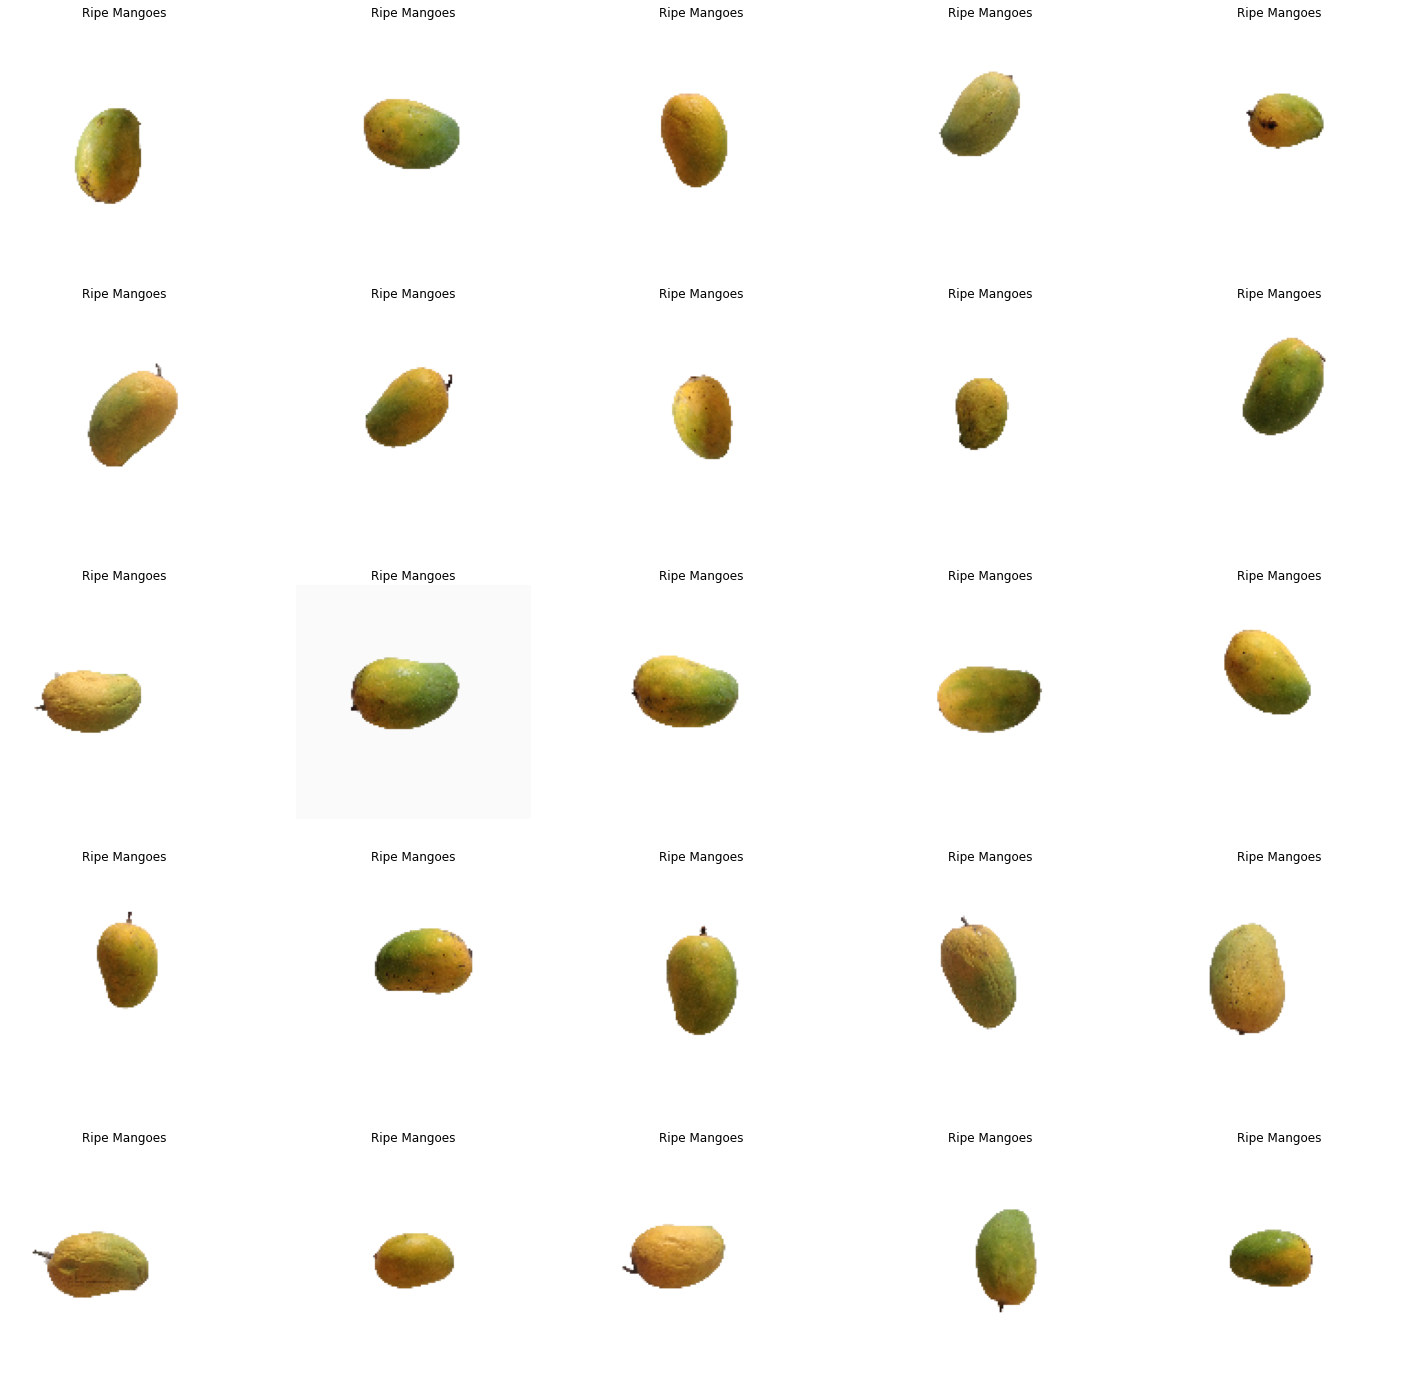

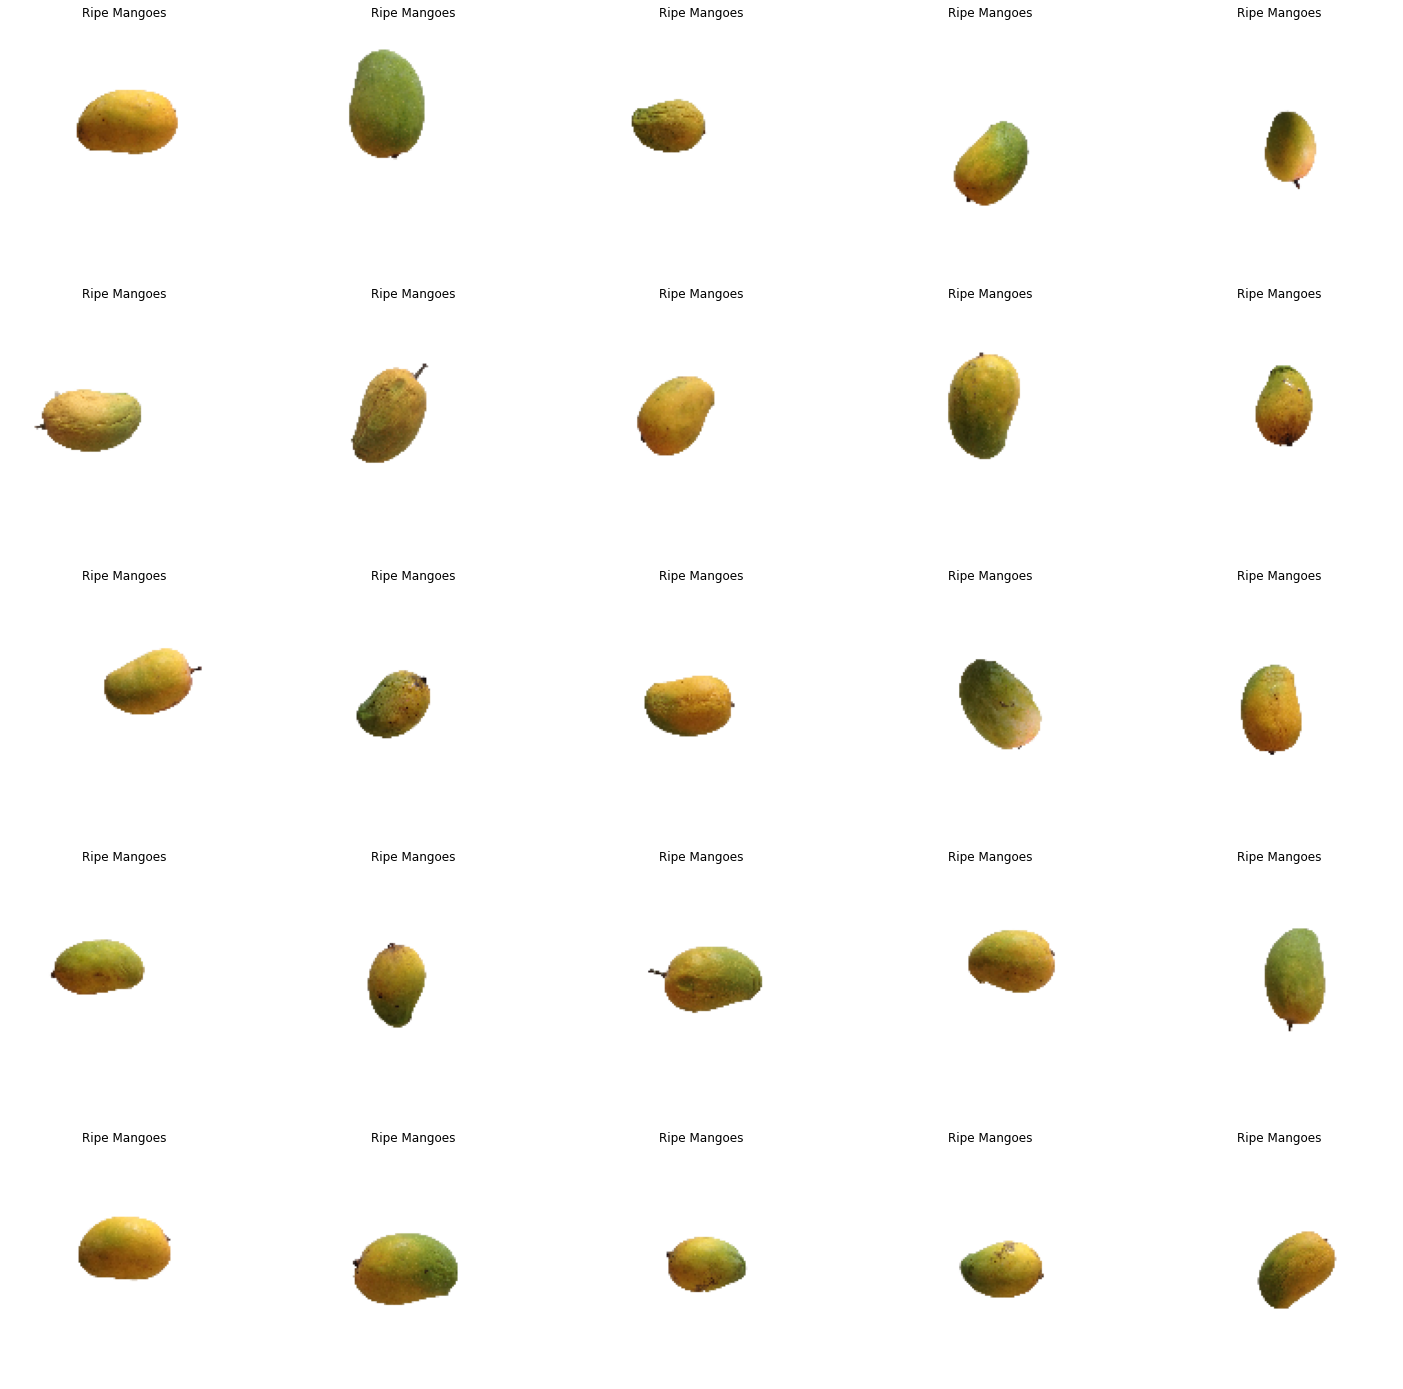

In [31]:
plt.figure(figsize=(25,25))
temp = df[df['label']==2]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file, target_size=(128,128))
    img = np.array(img)
    plt.imshow(img)
    plt.title('Ripe Mangoes')
    plt.axis('off')

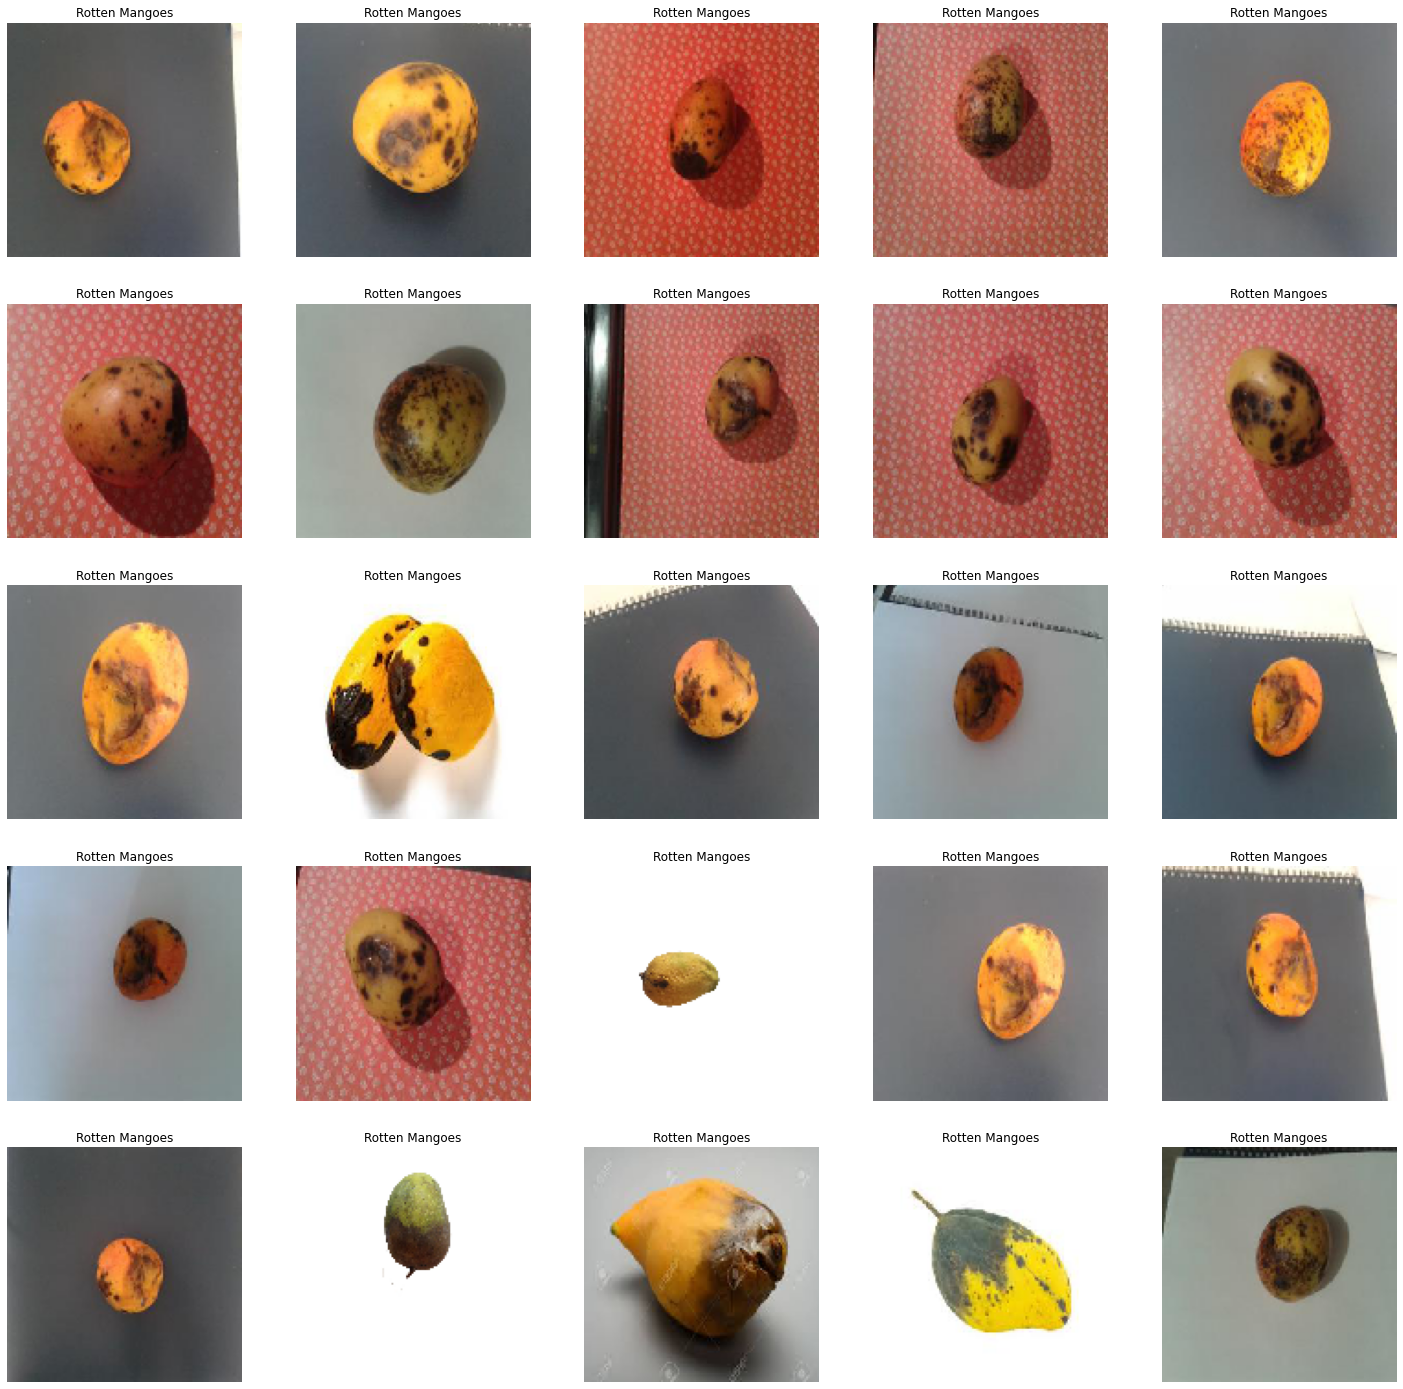

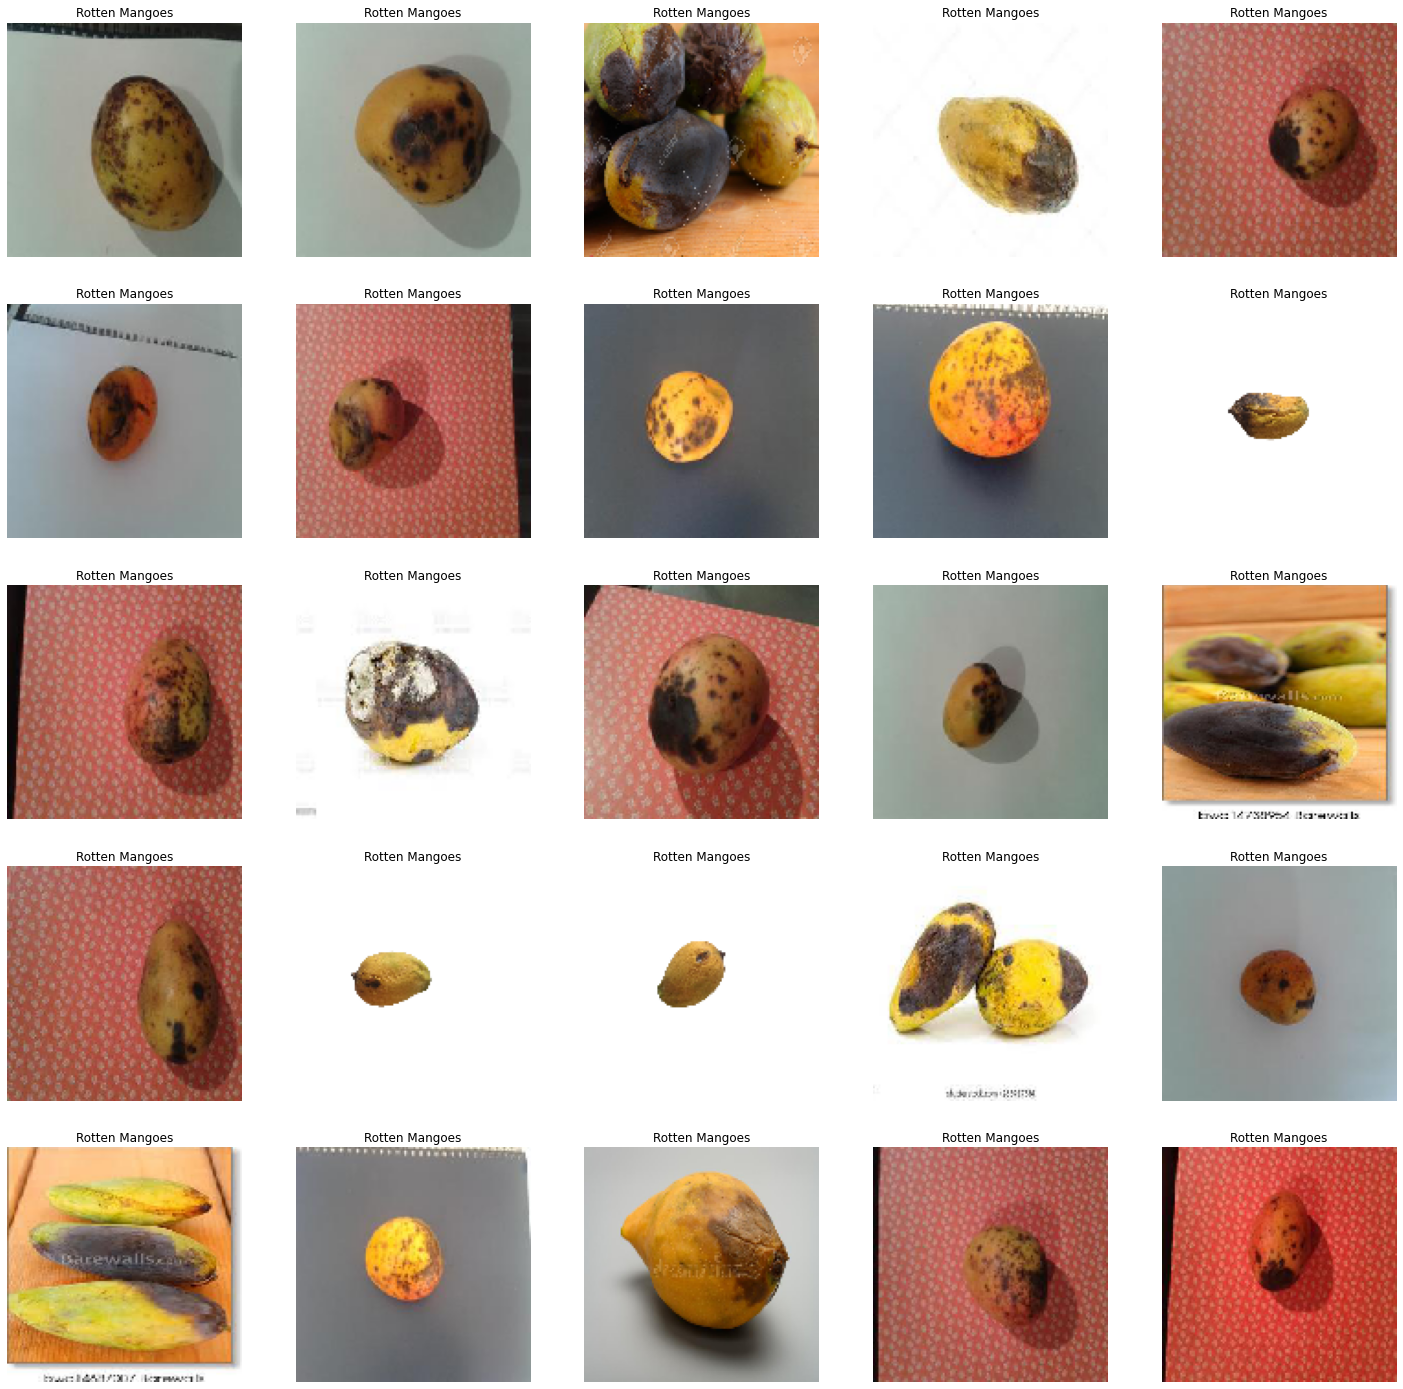

In [32]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file, target_size=(128,128))
    img = np.array(img)
    plt.imshow(img)
    plt.title('Rotten Mangoes')
    plt.axis('off')

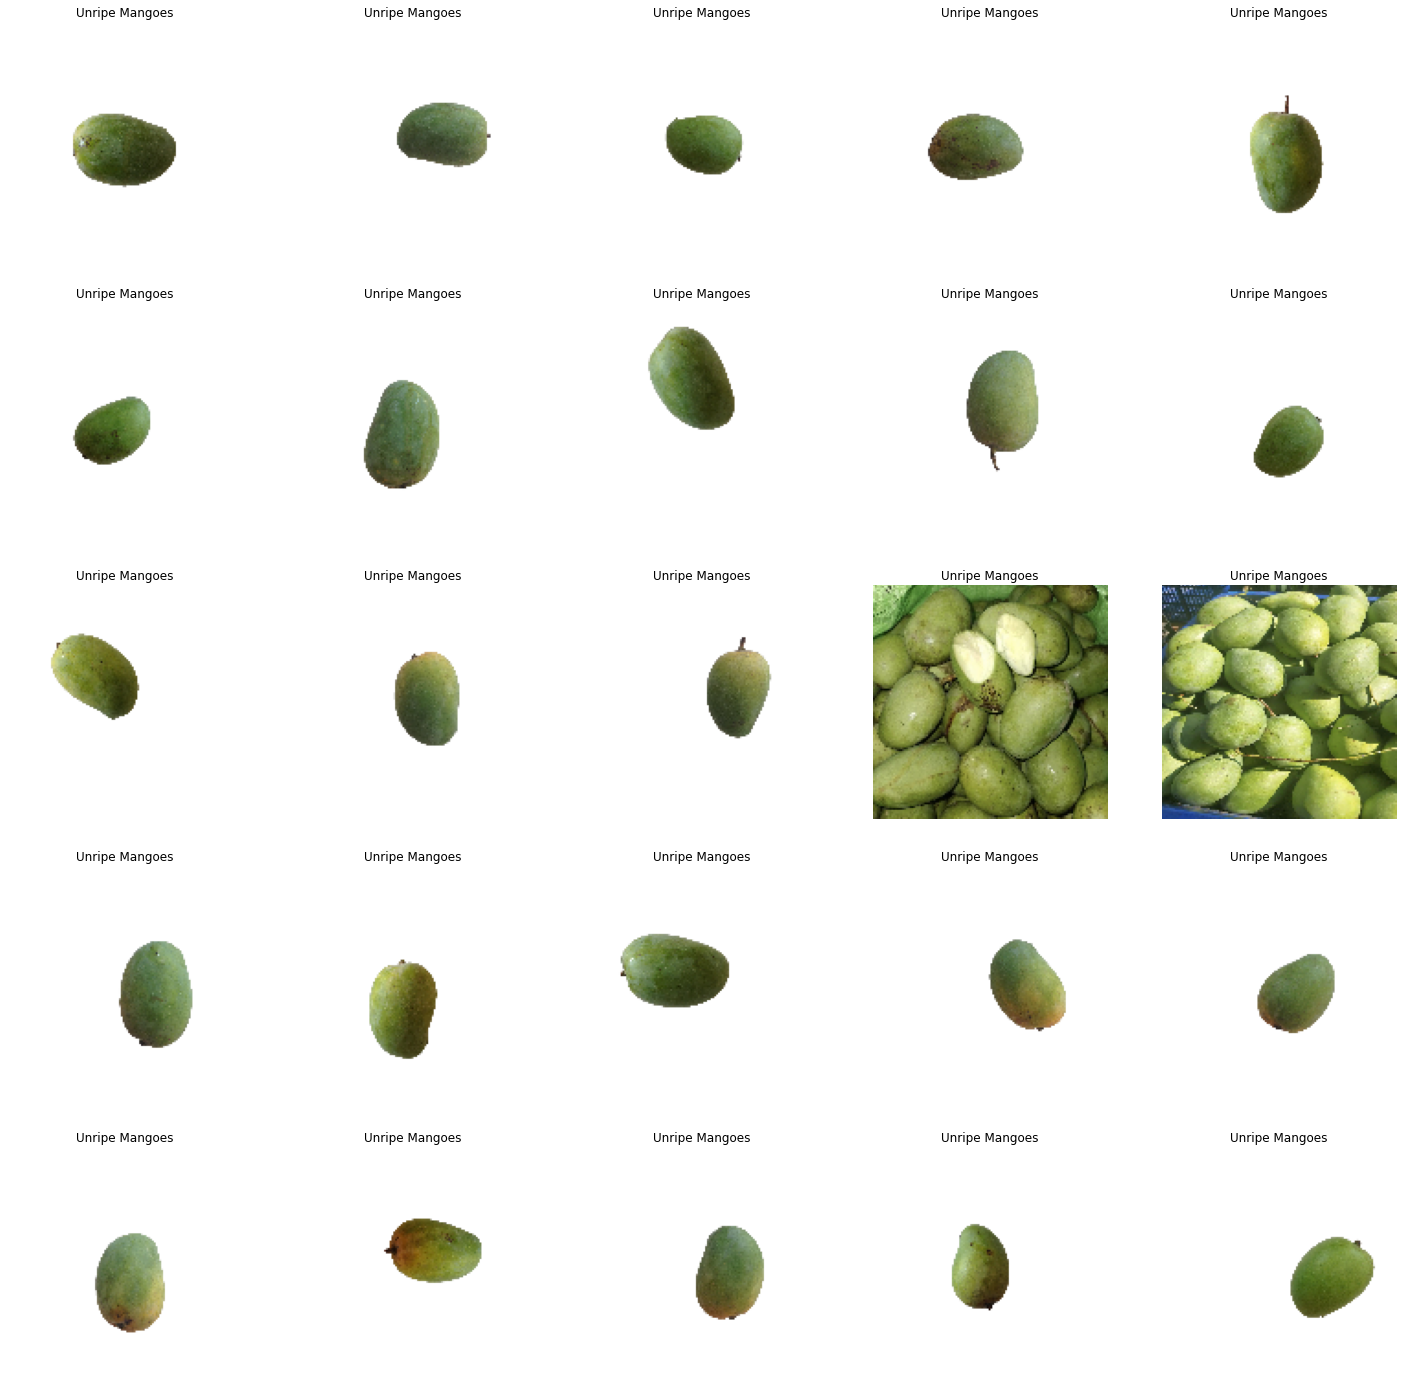

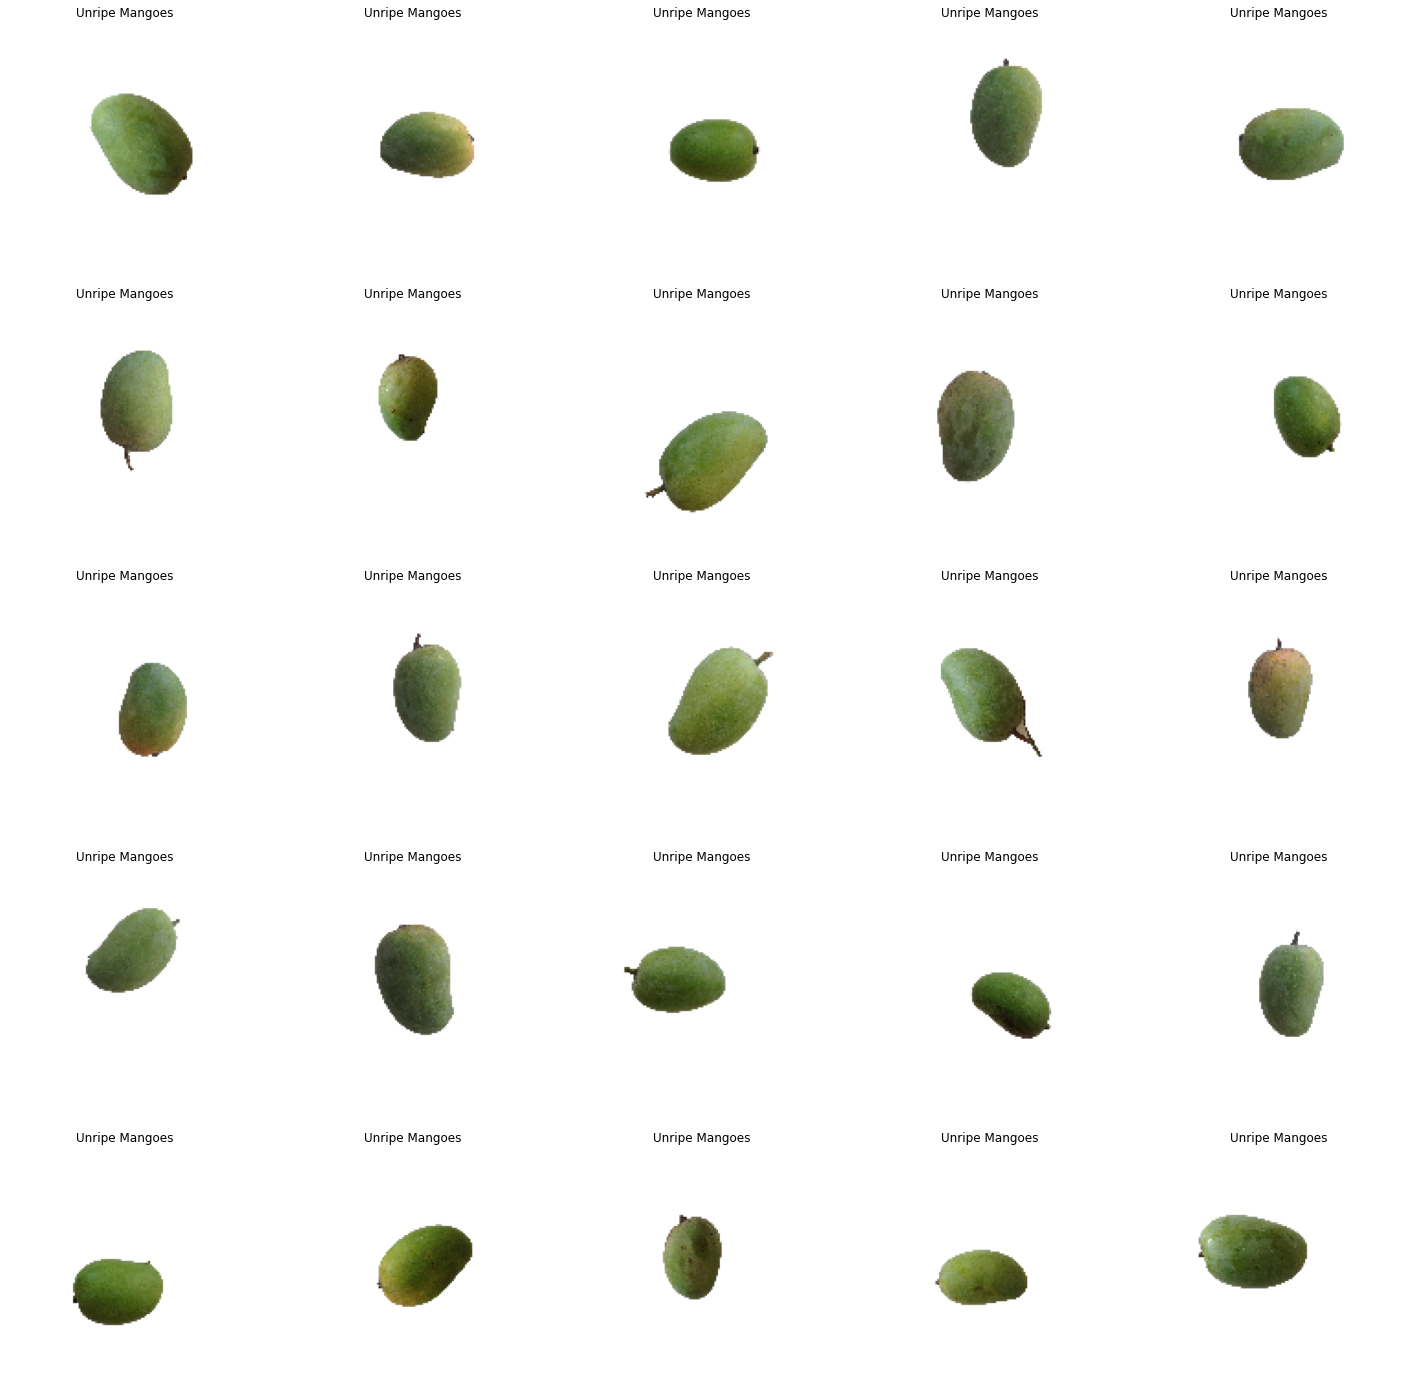

In [33]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    if '.jpg' in file:
      img = load_img(file, target_size=(128,128))
      img = np.array(img)
      plt.imshow(img)
      plt.title('Unripe Mangoes')
      plt.axis('off')

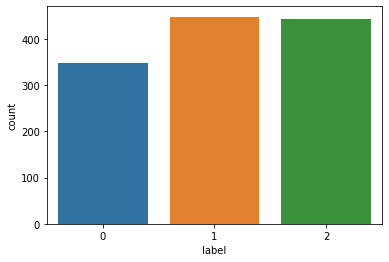

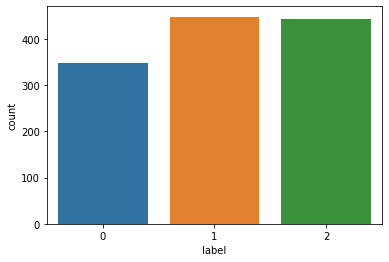

In [34]:
import seaborn as sns
sns.countplot(df['label'])

In [35]:
df['label'] = df['label'].astype('str')
df.sample()

images label
1162  /content/drive/MyDrive/assets/dataset/muda/unr...     0

images label
882  /content/drive/MyDrive/assets/dataset/matang/p...     2

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=32)

In [37]:
from keras.preprocessing.image import ImageDataGenerator
# augmented Image
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

In [38]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=32, 
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    test,
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=32, 
    class_mode='categorical'
)

Found 992 validated image filenames belonging to 3 classes.
Found 248 validated image filenames belonging to 3 classes.
Found 992 validated image filenames belonging to 3 classes.
Found 248 validated image filenames belonging to 3 classes.


In [39]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
tf.compat.v1.set_random_seed(2019)

model = Sequential([
                    Conv2D(16,(3,3),activation = "relu", input_shape = (128,128,3)),
                    MaxPooling2D(2,2),
                    Conv2D(32,(3,3),activation = "relu"),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation = "relu"),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(550,activation="relu"), #Adding the Hidden layer
                    Dropout(0.1,seed = 2019), 
                    Dense(300,activation="relu"),
                    Dropout(0.4,seed = 2019),
                    Dense(200,activation ="relu"),
                    Dropout(0.2,seed = 2019),
                    Dense(3,activation = "softmax") #Adding the Output Layer
])

In [40]:
# a summary of the CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [41]:
# required to specify optimizers.
from keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# train model using model.fit 
training = model.fit(
    train_generator,
    steps_per_epoch=25,  
    epochs=20, 
    validation_data=val_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5,  
    verbose=2
)

Epoch 1/20
25/25 - 70s - loss: 0.7537 - accuracy: 0.6612 - val_loss: 0.3812 - val_accuracy: 0.8562 - 70s/epoch - 3s/step
Epoch 2/20
25/25 - 66s - loss: 0.3383 - accuracy: 0.8875 - val_loss: 0.1705 - val_accuracy: 0.9438 - 66s/epoch - 3s/step
Epoch 3/20
25/25 - 63s - loss: 0.2687 - accuracy: 0.9112 - val_loss: 0.3162 - val_accuracy: 0.9000 - 63s/epoch - 3s/step
Epoch 4/20
25/25 - 66s - loss: 0.2870 - accuracy: 0.9013 - val_loss: 0.2127 - val_accuracy: 0.9312 - 66s/epoch - 3s/step
Epoch 5/20
25/25 - 63s - loss: 0.3216 - accuracy: 0.9013 - val_loss: 0.2341 - val_accuracy: 0.9187 - 63s/epoch - 3s/step
Epoch 6/20
25/25 - 65s - loss: 0.2682 - accuracy: 0.9125 - val_loss: 0.1952 - val_accuracy: 0.9375 - 65s/epoch - 3s/step
Epoch 7/20
25/25 - 63s - loss: 0.2748 - accuracy: 0.9100 - val_loss: 0.2456 - val_accuracy: 0.9125 - 63s/epoch - 3s/step
Epoch 8/20
25/25 - 63s - loss: 0.2341 - accuracy: 0.9187 - val_loss: 0.3173 - val_accuracy: 0.8938 - 63s/epoch - 3s/step
Epoch 9/20
25/25 - 64s - loss: 0

KeyboardInterrupt: ignored

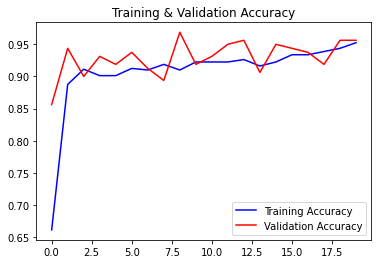

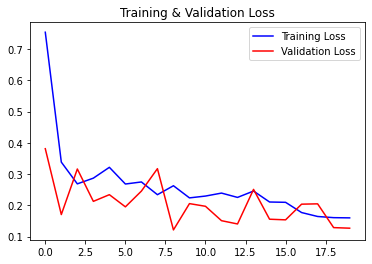

In [ ]:
# Plot the result summary
%matplotlib inline

loss = training.history['loss']
val_loss = training.history['val_loss']
accuracy = training.history['accuracy']
val_accuracy = training.history['val_accuracy']

ephoc = range(len(accuracy))

plt.title('Training & Validation Accuracy')
plt.plot(ephoc, accuracy, 'blue', label='Training Accuracy')
plt.plot(ephoc, val_accuracy, 'red', label='Validation Accuracy')
plt.legend(loc=0)
plt.show()

plt.title('Training & Validation Loss')
plt.plot(ephoc, loss, 'blue', label='Training Loss')
plt.plot(ephoc, val_loss, 'red', label='Validation Loss')
plt.legend(loc=0)

plt.show()

Saving mixripemsb1.jpg to mixripemsb1 (1).jpg
1/1 [==============================] - 0s 124ms/step
mixripemsb1.jpg
Ripe Mango


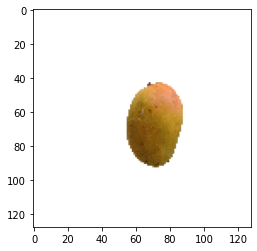

In [43]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128,128))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  # resize image
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)

  print(fn)
  if outclass == 0:
    print('Unripe Mango')
  elif outclass == 1:
    print('Rotten Mango')
  else:
    print('Ripe Mango')